<a href="https://colab.research.google.com/github/SoumaPatra/ML-PROJECT/blob/main/Spam_sms_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')



In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
993,ham,The Xmas story is peace.. The Xmas msg is love...,NaN,NaN,NaN
5057,ham,"Geeeee ... Your internet is really bad today, ...",NaN,NaN,NaN
722,ham,That is wondar full flim.,NaN,NaN,NaN
4305,ham,Awww dat is sweet! We can think of something t...,NaN,NaN,NaN
5500,ham,Love has one law; Make happy the person you lo...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
4646,ham,God created gap btwn ur fingers so dat sum1 vr...
2323,ham,Sorry dude. Dont know how i forgot. Even after...
2824,spam,Congratulations - Thanks to a good friend U ha...
1991,ham,No other Valentines huh? The proof is on your ...
475,ham,Ok I'm gonna head up to usf in like fifteen mi...


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
5373,ham,"K I'll head out in a few mins, see you there"
4137,ham,"Good! No, donÛ÷t need any receiptsÛÓwell don..."
1991,ham,No other Valentines huh? The proof is on your ...
5541,ham,Yeah it's jus rite...
2453,ham,How much she payed. Suganya.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()


,0
target,0
text,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


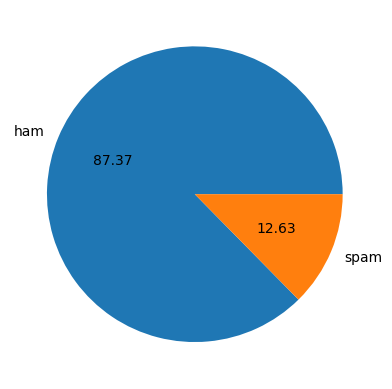

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)


In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))

,text
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

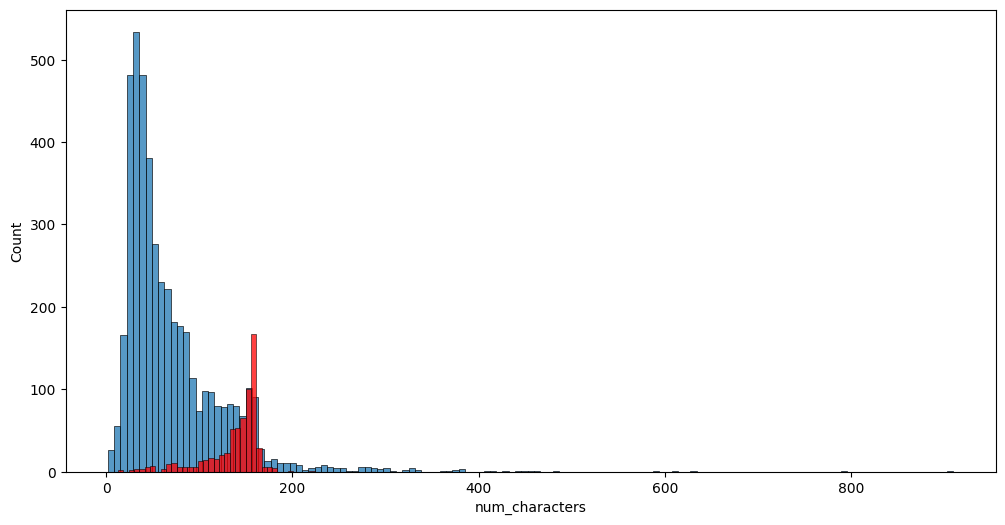

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

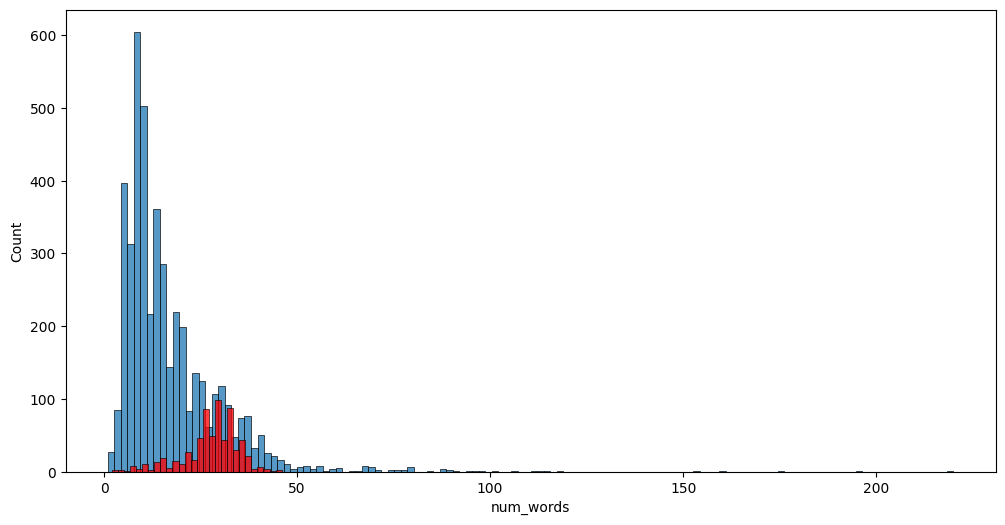

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


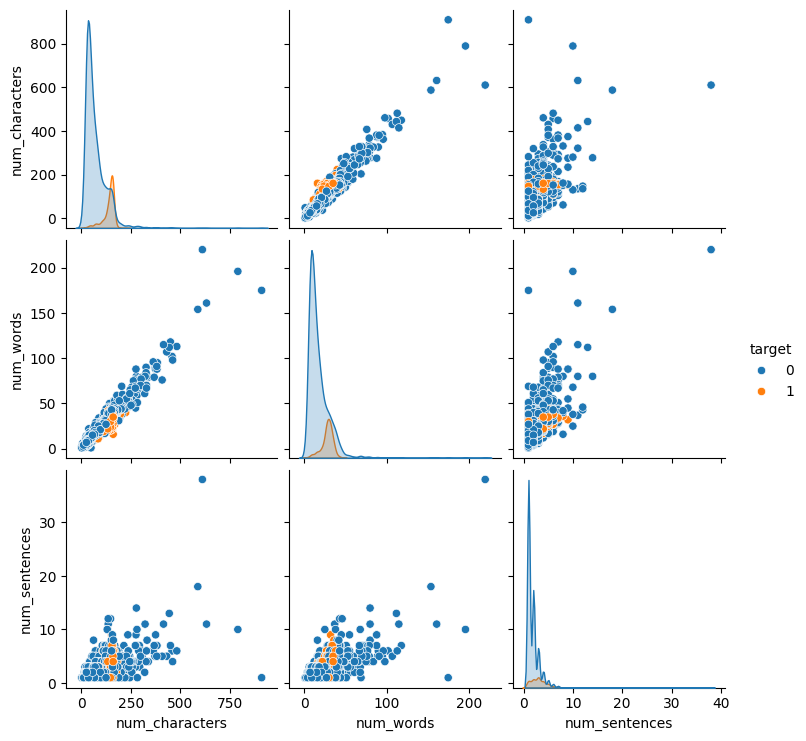

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
     pip install seaborn matplotlib

In [ ]:
     import seaborn as sns
     import matplotlib.pyplot as plt

<Axes: >

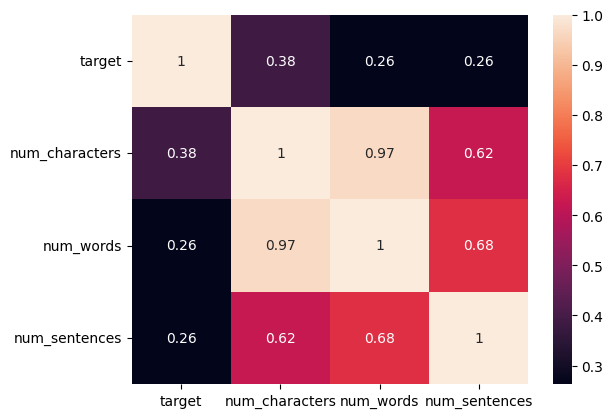

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')  # Download stopwords data (only needed once)

def transform_text(text):
    # Your text transformation logic here
    y = []
    text = text.lower()  # Convert to lowercase

    for word in text.split():  # Split into words first
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)

    return " ".join(y)  # Join the filtered words back into a string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
cleaned_text = transform_text(text)
print(cleaned_text)

gonna home soon want talk stuff anymore tonight, k? cried enough today.


In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


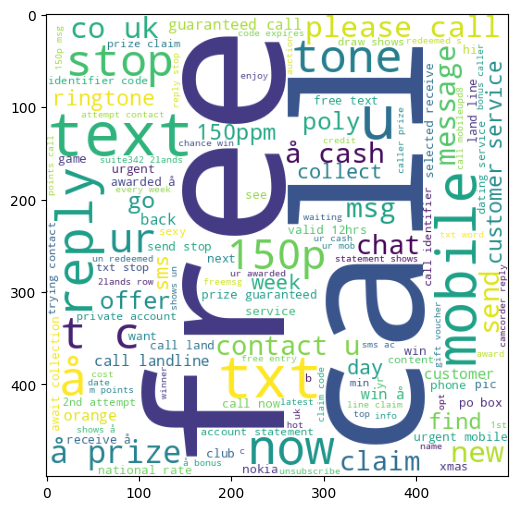

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

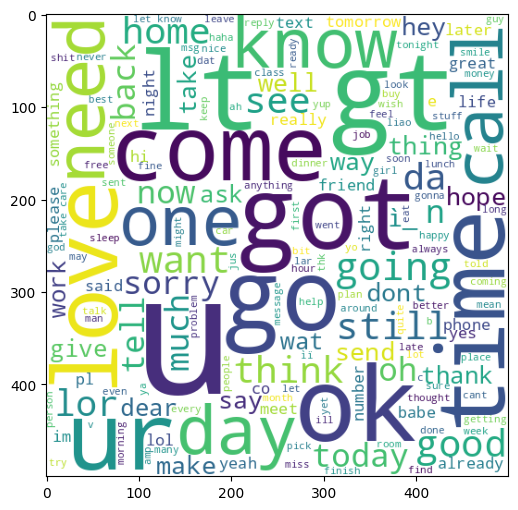

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

11061

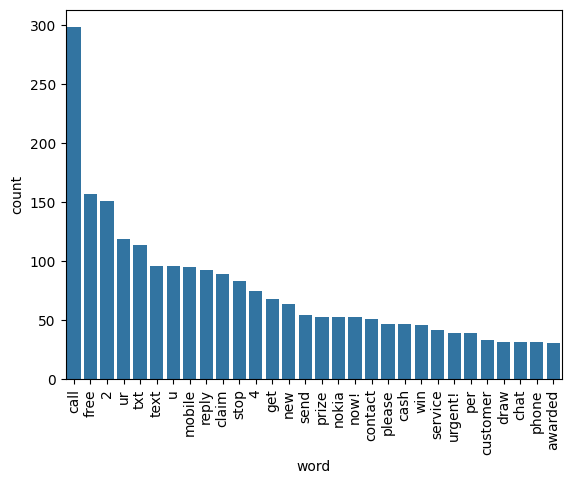

In [ ]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Counter to DataFrame
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using named arguments
sns.barplot(x='word', y='count', data=top_spam_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"go jurong point, crazy.. available bugis n gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor... u c already say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"nah think goes usf, lives around though"


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

NameError: name 'df' is not defined

In [ ]:
X.shape

(1000, 20)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8994197292069632
[[811  85]
 [ 19 119]]
0.5833333333333334


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[895   1]
 [ 22 116]]
0.9914529914529915


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9672131147540983)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9672131147540983
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  DT
Accuracy -  0.9448742746615088
Precision -  0.8857142857142857
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487
For  AdaBoost
Accuracy -  0.9332688588007737
Precision -  0.9058823529411765
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8769230769230769
For  ETC
Accuracy -  0.9825918762088974
Precision -  0.9761904761904762
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9375
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
2,NB,0.977756,0.991453
10,xgb,0.972921,0.982456
8,ETC,0.982592,0.976190
0,SVC,0.976789,0.967213
5,RF,0.973888,0.966387
4,LR,0.952611,0.949495
9,GBDT,0.947776,0.937500
6,AdaBoost,0.933269,0.905882
3,DT,0.944874,0.885714


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.903288
1,NB,Accuracy,0.977756
2,xgb,Accuracy,0.972921
3,ETC,Accuracy,0.982592
4,SVC,Accuracy,0.976789
5,RF,Accuracy,0.973888
6,LR,Accuracy,0.952611
7,GBDT,Accuracy,0.947776
8,AdaBoost,Accuracy,0.933269
9,DT,Accuracy,0.944874


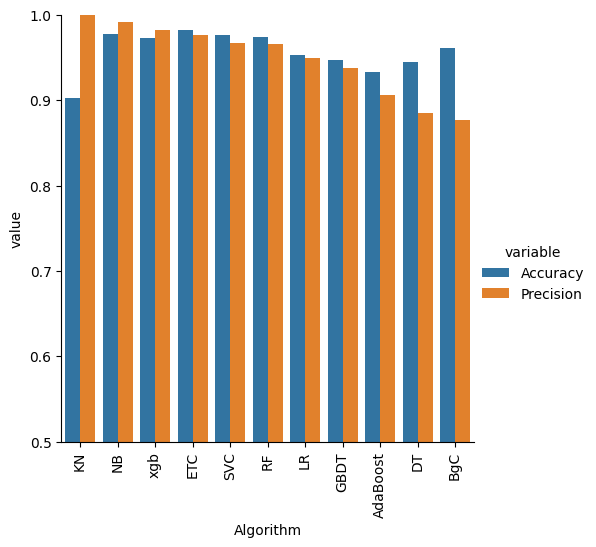

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000,0.903288,1.000000
1,NB,0.977756,0.991453,0.977756,0.991453,0.977756,0.991453,0.977756,0.991453
2,xgb,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
3,ETC,0.982592,0.976190,0.982592,0.976190,0.982592,0.976190,0.982592,0.976190
4,SVC,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213,0.976789,0.967213
5,RF,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
6,LR,0.952611,0.949495,0.952611,0.949495,0.952611,0.949495,0.952611,0.949495
7,GBDT,0.947776,0.937500,0.947776,0.937500,0.947776,0.937500,0.947776,0.937500
8,AdaBoost,0.933269,0.905882,0.933269,0.905882,0.933269,0.905882,0.933269,0.905882
9,DT,0.944874,0.885714,0.944874,0.885714,0.944874,0.885714,0.944874,0.885714


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC  # <-- Import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier

# Initialize individual models
svc = SVC(probability=True)  # Required for soft voting
mnb = MultinomialNB()
etc = ExtraTreesClassifier()

# Now create VotingClassifier
voting = VotingClassifier(
    estimators=[('svm', svc), ('nb', mnb), ('et', etc)],
    voting='soft'  # 'soft' for probability voting, 'hard' for majority vote
)

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB  # Changed from MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

# 1. Scale data to remove negatives (if using MultinomialNB)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Initialize models
svc = SVC(probability=True, random_state=42)
mnb = ComplementNB()  # Handles text data better
etc = ExtraTreesClassifier(random_state=42)

# 3. Create and fit VotingClassifier
voting = VotingClassifier(
    estimators=[('svm', svc), ('nb', mnb), ('et', etc)],
    voting='soft'
)
voting.fit(X_train_scaled, y_train)  # Works now!

# 4. Evaluate
print("Test accuracy:", voting.score(X_test_scaled, y_test))

Test accuracy: 0.86


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

y_pred = voting.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.835
Precision: 0.8775510204081632


In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.835
Precision 0.8775510204081632


In [ ]:

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9
Precision 0.9484536082474226


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf = TfidfVectorizer()
mnb = MultinomialNB()

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [ ]:
! pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.245.18.96


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴⠦⠧your url is: https://warm-carrots-smile.loca.lt
